# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import seaborn as sns

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31021019/FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [4]:
df.Price.describe()

count    7381.000000
mean       15.738709
std        22.418284
min         0.253900
25%         3.223600
50%         5.909600
75%        20.441900
max       159.445800
Name: Price, dtype: float64

# 2. Kiểm tra dữ liệu ngoại lai

<AxesSubplot:xlabel='Price'>

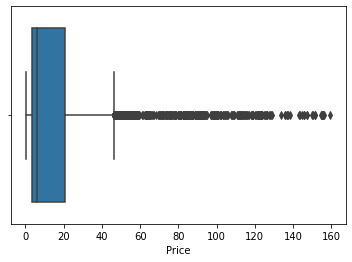

In [5]:
# Vẽ biểu đồ boxplot cho thuộc tính "Price"
sns.boxplot(x = df.Price, data = df)

In [6]:
df1 = df[(df.Price > 0) & (df.Price < 40)]

<AxesSubplot:xlabel='Price', ylabel='Density'>

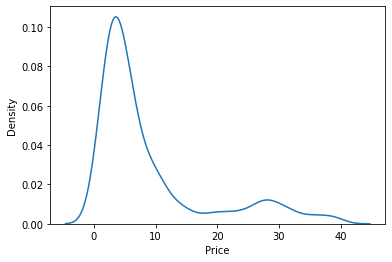

In [7]:
# Vẽ lại biểu đồ phân bố
sns.kdeplot(x = df1.Price, data = df1)

# 3. Vẽ đồ thị

- 3.1. Biểu đồ xu hướng

In [8]:
rice_df = df[df.ProductId == 52]

In [9]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 5833
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        174 non-null    object 
 1   ProductId    174 non-null    int64  
 2   ProductName  174 non-null    object 
 3   UmId         174 non-null    int64  
 4   UmName       174 non-null    object 
 5   Month        174 non-null    int64  
 6   Year         174 non-null    int64  
 7   Price        174 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 12.2+ KB


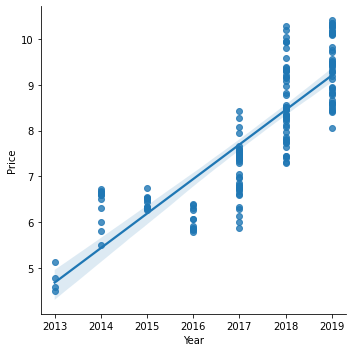

In [11]:
# Vẽ biểu đồ xu hướng của sản phẩm gạo qua các năm
sns.lmplot(x = "Year", y = "Price", data = rice_df)

In [12]:
# Lọc giá vận chuyển và giá gạo
df.ProductName.unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

In [13]:
conditions = (df.ProductName == "Rice - Retail") | (df.ProductName == "Transport (public) - Retail")
tran_df = df[conditions]
tran_df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


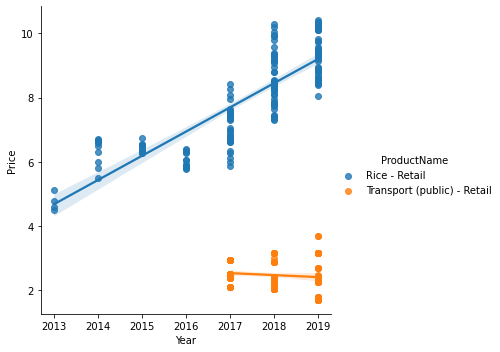

In [14]:
sns.lmplot(x = "Year", y = "Price", hue = "ProductName", data = tran_df)

- 3.2. Biểu đồ phân bố Violin

<AxesSubplot:ylabel='Price'>

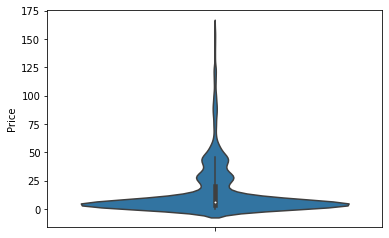

In [15]:
# Biểu đồ phân bố cho thuộc tính "Price"
sns.violinplot(y = "Price", data = df)

<AxesSubplot:ylabel='Year'>

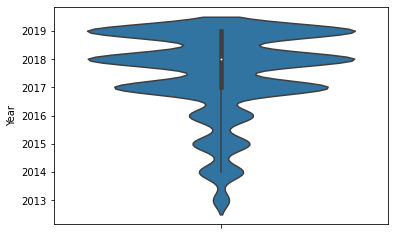

In [16]:
# Biểu đồ phân bố theo năm
sns.violinplot(y = "Year", data = df)

- 3.3. Vẽ biểu đồ tần số

<AxesSubplot:xlabel='Year', ylabel='count'>

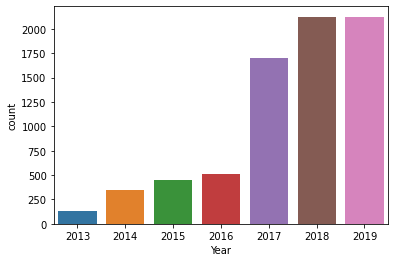

In [17]:
# Biểu đồ tần số cho các sản phẩm theo năm
sns.countplot(x = "Year", data = df)

<AxesSubplot:xlabel='Place', ylabel='count'>

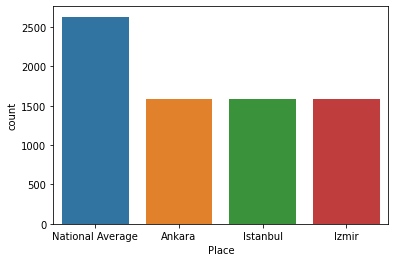

In [18]:
# Thống kê sản phẩm theo địa điểm
sns.countplot(x = "Place", data = df)

<AxesSubplot:xlabel='Year', ylabel='count'>

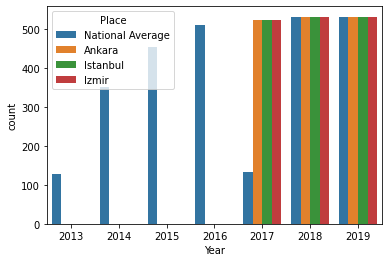

In [19]:
# Hiển thị quan hệ giữa số lượng theo năm được nhóm theo địa điểm
sns.countplot(x = "Year", hue = "Place", data = df)

- 3.4. Biểu đồ boxplot

<AxesSubplot:xlabel='Price'>

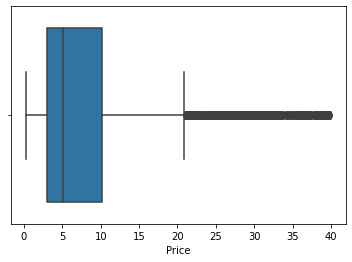

In [21]:
# Vẽ biểu đồ boxplot cho thuộc tính sản phẩm
sns.boxplot(x = "Price", data = df1)

<AxesSubplot:xlabel='Year', ylabel='Price'>

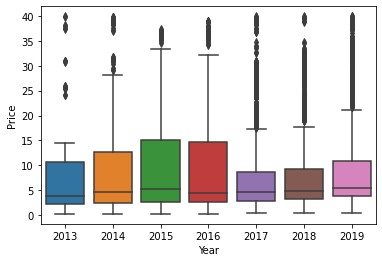

In [22]:
# Vẽ biểu đồ boxplot giá sản phẩm phân bố theo năm
sns.boxplot(x = "Year", y = "Price", data = df1)